# RandomForests Classification White Wine


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Ready CSV 

In [2]:
df = pd.read_csv("./Resources/Data/winequality-white-clean.csv", delimiter=',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Fair
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Fair
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Fair
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Fair
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Very Good


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(3961, 11) (3961,)


# Create a Train Test Split

In [4]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.333,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2772, 11) (793, 11) (396, 11) (2772,) (793,) (396,)


# Train the Model

--------
1
RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)
k: 1, Train/Test Score: 1.000/0.820
OOB_Score : 0.8275613275613276
--------
2
RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
k: 2, Train/Test Score: 0.994/0.808
OOB_Score : 0.8308080808080808
--------
3
RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_jobs=-1,
                       oob_score=True)
k: 3, Train/Test Score: 0.971/0.810
OOB_Score : 0.8221500721500722
--------
4
RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_jobs=-1,
                       oob_score=True)
k: 4, Train/Test Score: 0.948/0.821
OOB_Score : 0.8318903318903319
--------
5
RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_jobs=-1,
                       oob_score=True)
k: 5, Train/Test Score: 0.927/0.811
OOB_Score : 0.8272005772005772
--------
6
RandomForestClassifier(criterion='entropy', min_samples_leaf=6, n_jobs=-

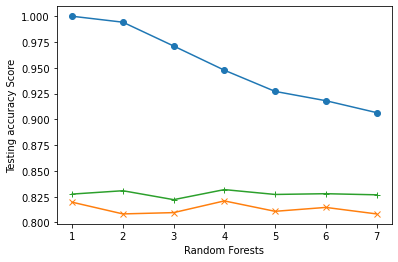

In [5]:
#Train your first model with choosen parameters

train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='entropy')

    print("--------")
    print(k)
    print(rf)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

--------
1
RandomForestClassifier(n_jobs=-1, oob_score=True)
k: 1, Train/Test Score: 1.000/0.807
OOB_Score : 0.8235930735930735
--------
2
RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, oob_score=True)
k: 2, Train/Test Score: 0.985/0.808
OOB_Score : 0.8351370851370852
--------
3
RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, oob_score=True)
k: 3, Train/Test Score: 0.962/0.815
OOB_Score : 0.8326118326118326
--------
4
RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
k: 4, Train/Test Score: 0.941/0.811
OOB_Score : 0.829004329004329
--------
5
RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, oob_score=True)
k: 5, Train/Test Score: 0.919/0.808
OOB_Score : 0.8253968253968254
--------
6
RandomForestClassifier(min_samples_leaf=6, n_jobs=-1, oob_score=True)
k: 6, Train/Test Score: 0.909/0.810
OOB_Score : 0.8275613275613276
--------
7
RandomForestClassifier(min_samples_leaf=7, n_jobs=-1, oob_score=True)
k: 7, Train/Test Score: 0.900/0.801
OOB_Score : 0.82

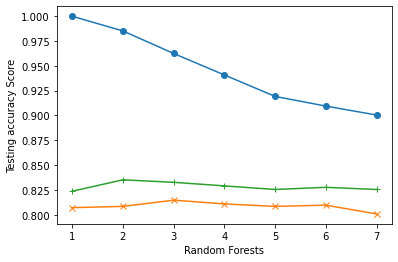

In [6]:
#Train your first model with choosen parameters

train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='gini')

    print("--------")
    print(k)
    print(rf)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [7]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Check it out how GridSearchCV can perform

param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[100, 200],
              'min_samples_leaf':[1,2,3,4,5,6]}
              
                       
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [8]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.823) total time=   1.3s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.831) total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.818) total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.816) total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.843) total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.816) total time=   0.3s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.827) total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.832) total

[CV 5/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.852) total time=   0.3s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.990, test=0.832) total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.836) total time=   0.2s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.829) total time=   0.2s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.810) total time=   0.2s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.856) total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.995, test=0.818) total time=   0.3s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.995, test=0.834) total time=   0.3s
[CV 3/5] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=7, n_jobs=-1,
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [9]:
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 200}
0.8326132630825771


In [10]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.356214,0.457836,0.015397,0.000321,gini,1,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.823423,0.830631,...,0.826118,0.009870,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.232663,0.006948,0.026537,0.000984,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.816216,0.827027,...,0.828288,0.014621,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.124277,0.001912,0.015106,0.000230,gini,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.809009,0.836036,...,0.826843,0.016142,14,0.981958,0.984664,0.988278,0.986925,0.986925,0.985750,0.002223
3,0.230462,0.005473,0.026365,0.000571,gini,2,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.819820,0.823423,...,0.830093,0.015557,6,0.983762,0.985115,0.985122,0.986474,0.984220,0.984939,0.000930
4,0.123683,0.004156,0.015065,0.000163,gini,3,100,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.821622,0.834234,...,0.830810,0.014295,4,0.955796,0.959405,0.961677,0.956267,0.962128,0.959055,0.002640


In [11]:
#Now that  found my best parameters I combine train and val and I do it one more time

In [12]:
#Choose the best parameter and run a final test from one of those:
#1 - Previus tuning or
#2 - GridSearch
best_rf = grid.best_estimator_ #Chose this because GridSearch got a 0.883 score
#best_rf = rf
print(best_rf)
#Run one more time on the train data
best_rf.fit(X_train, y_train)
print(f'Train Data: {best_rf.score(X_train, y_train), best_rf.score(X_val, y_val)}')
#Concatenate the train and test
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation Data : {best_rf.score(X_val,y_val)}')
print(f'Final result Test Data: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       oob_score=True)
Train Data: (1.0, 0.8095838587641866)
Train and Validation Data Concat: 1.0
Validation Data : 1.0
Final result Test Data: 0.8535353535353535


In [13]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [14]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.87      0.96      0.91       305
   Very Good       0.78      0.51      0.61        91

    accuracy                           0.85       396
   macro avg       0.82      0.73      0.76       396
weighted avg       0.85      0.85      0.84       396



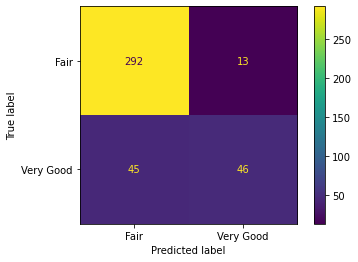

In [15]:
plot_confusion_matrix(best_rf, X_test, y_test)  
plt.show() 

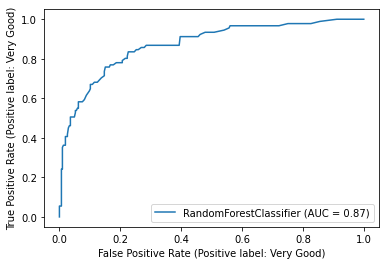

In [16]:
rf_disp = plot_roc_curve(best_rf, X_test, y_test)
plt.show()

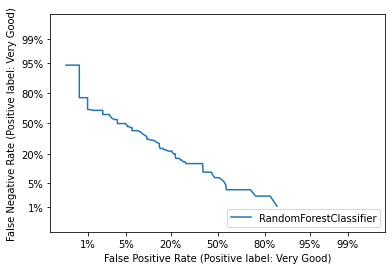

In [17]:
rf_disp = metrics.plot_det_curve(best_rf, X_test, y_test)  
plt.show()   

## Display features importance

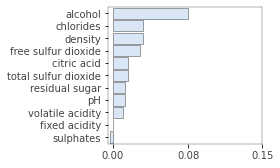

In [18]:
from rfpimp import *
imp = importances(best_rf, X_test, y_test, n_samples=-1)

viz = plot_importances(imp)
viz.view()

In [19]:
# Drop less import features
X = df.drop(['sulphates','fixed acidity', 'volatile acidity','quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)

(3961, 8) (3961,)


In [20]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.333,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2772, 8) (793, 8) (396, 8) (2772,) (793,) (396,)


In [21]:
best_rf = grid.best_estimator_ #Chose this because GridSearch got a 0.883 score
#best_rf = rf
print(best_rf)
#Run one more time on the train data
best_rf.fit(X_train, y_train)
print(f'Train Data: {best_rf.score(X_train, y_train), best_rf.score(X_val, y_val)}')
#Concatenate the train and test
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation Data : {best_rf.score(X_val,y_val)}')
print(f'Final result Test Data: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       oob_score=True)
Train Data: (1.0, 0.8171500630517023)
Train and Validation Data Concat: 1.0
Validation Data : 1.0
Final result Test Data: 0.8535353535353535


In [22]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [23]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.87      0.96      0.91       305
   Very Good       0.78      0.51      0.61        91

    accuracy                           0.85       396
   macro avg       0.82      0.73      0.76       396
weighted avg       0.85      0.85      0.84       396



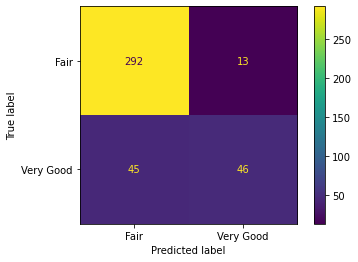

In [24]:
plot_confusion_matrix(best_rf, X_test, y_test)  
plt.show()

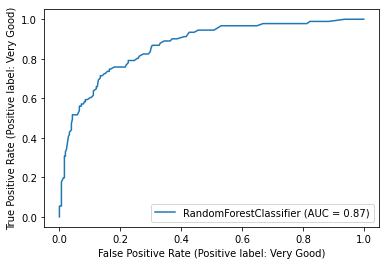

In [25]:
rf_disp = plot_roc_curve(best_rf, X_test, y_test)
plt.show()

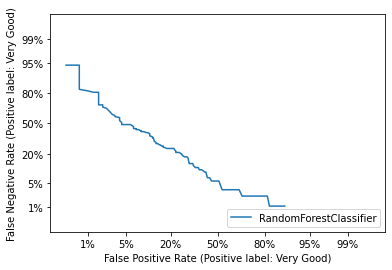

In [26]:
rf_disp = metrics.plot_det_curve(best_rf, X_test, y_test)  
plt.show() 